### 目录
#### 输入和处理矢量数据

（1）什么是 sf 数据

（2）什么是 sp 数据

（3）生成简单的地图，基本可视化

（4）矢量数据拼接和整理

（5）矢量数据的写出

##### 地区分布图——等值图

（1）基本可视化

（2）调色板

（3）图的写出


In [1]:
library(sf)    # sf 专门用来读取、处理矢量数据       
library(ggplot2)  # 可视化    
library(dplyr)  # 用来整理数据      
library(tidyr)  # dplyr 和 tidyr 非常相似            
library(RColorBrewer) # 调色板
library(cowplot) # 拼接组图

Warning message:
"程辑包'sf'是用R版本4.2.3 来建造的"
Linking to GEOS 3.9.3, GDAL 3.5.2, PROJ 8.2.1; sf_use_s2() is TRUE

Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"程辑包'tidyr'是用R版本4.2.3 来建造的"


## 输入地理信息数据

数据广义 Oklahoma 州 龙卷风的分布历史记录，以 shapefile 的形式存储

shapefile 是最广为使用的地理数据格式，

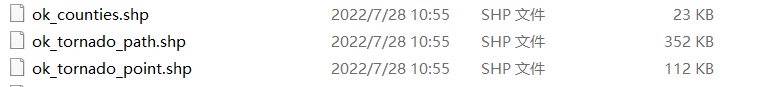

ok_counties.shp 包含 Oklahoma 的边界数据

ok_tornado_point.shp 和 ok_tornado_path.shp 包含 Oklahoma 历史上的龙卷风情况

#####  sf 中包含一列  “geometry” 专门存放地理信息

In [3]:
okcounty <- st_read("C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/ok_counties.shp", quiet = TRUE)
okcounty

STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,geometry
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POLYGON [arc_degree]>
40,077,01101826,0500000US40077,40077,Latimer,06,POLYGON ((-95.50766 35.0292...
40,025,01101800,0500000US40025,40025,Cimarron,06,POLYGON ((-103.0025 36.6751...
40,011,01101793,0500000US40011,40011,Blaine,06,POLYGON ((-98.6369 36.16489...
40,107,01101841,0500000US40107,40107,Okfuskee,06,POLYGON ((-96.62486 35.4627...
40,105,01101840,0500000US40105,40105,Nowata,06,POLYGON ((-95.80982 36.9419...
40,153,01101864,0500000US40153,40153,Woodward,06,POLYGON ((-99.60556 36.5927...
40,001,01101788,0500000US40001,40001,Adair,06,POLYGON ((-94.79728 36.1613...
40,053,01101814,0500000US40053,40053,Grant,06,POLYGON ((-98.11199 36.9982...
40,059,01101817,0500000US40059,40059,Harper,06,POLYGON ((-100.0026 37.0016...


In [4]:
class(okcounty)

[1] "sf"         "data.frame"

#### 除了 sf 这种格式之外，另一种地理叫做 sp（“SpatialPolygonsDataFrame”）

In [5]:
# 将 sf 转化为 sp
okcounty_sp <- as(okcounty, 'Spatial')
class(okcounty_sp)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [6]:
# 将 sp 再转化回 sf
okcounty_sf <- st_as_sf(okcounty_sp)
class(okcounty_sf)

[1] "sf"         "data.frame"

##### 另外两个 sp 文件：

##### ok_tornado_point.shp 和 ok_tornado_path.shp 包含 Oklahoma 历史上的龙卷风情况

In [7]:
# ok_tornado_point.shp 是点数据
tpoint <- st_read("C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/ok_tornado_point.shp", quiet = TRUE)
head(tpoint)

om  yr   mo dy date       time     tz st stf stn geometry              ...
1 192 1950 10  1 1950-10-01 21:00:00 3  OK 40  23  POINT (-102.52 36.73) ...
2  27 1950  2 27 1950-02-27 10:20:00 3  OK 40   1  POINT (-97.6 35.55)   ...
3  38 1950  3 27 1950-03-27 03:00:00 3  OK 40   2  POINT (-95.75 34.85)  ...
4  57 1950  4 28 1950-04-28 14:17:00 3  OK 40   5  POINT (-99.28 34.88)  ...
5  60 1950  4 28 1950-04-28 19:05:00 3  OK 40   6  POINT (-96.4 35.08)   ...
6  61 1950  4 28 1950-04-28 19:30:00 3  OK 40   7  POINT (-96.2 34.55)   ...
  loss closs slat  slon    elat    elon      len  wid fc geometry             
1 4    0     36.73 -102.52 36.8800 -102.3000 15.8  10 0  POINT (-102.52 36.73)
2 4    0     35.55  -97.60 35.5501  -97.5999  2.0  50 0  POINT (-97.6 35.55)  
3 3    0     34.85  -95.75 34.8501  -95.7499  0.1  77 0  POINT (-95.75 34.85) 
4 5    0     34.88  -99.28 35.1700  -99.2000 20.8 400 0  POINT (-99.28 34.88) 
5 5    0     35.08  -96.40 35.1300  -96.3500  4.5 200 0  POINT (-96.4 35.08)  
6 4    0     34.55  -96.20 34.5501  -96.1999  0.8 100 0  POINT (-96.2 34.55)

In [8]:
# ok_tornado_path.shp 是线数据
tpath <- st_read("C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/ok_tornado_path.shp", quiet = TRUE)
head(tpath)

om  yr   mo dy date       time     tz st stf stn
1 192 1950 10  1 1950-10-01 21:00:00 3  OK 40  23 
2  27 1950  2 27 1950-02-27 10:20:00 3  OK 40   1 
3  38 1950  3 27 1950-03-27 03:00:00 3  OK 40   2 
4  57 1950  4 28 1950-04-28 14:17:00 3  OK 40   5 
5  60 1950  4 28 1950-04-28 19:05:00 3  OK 40   6 
6  61 1950  4 28 1950-04-28 19:30:00 3  OK 40   7 
  geometry                       ... loss closs slat  slon    elat    elon     
1 LINESTRING (-102.52 36.73, ... ... 4    0     36.73 -102.52 36.8800 -102.3000
2 LINESTRING (-97.6 35.55, -9... ... 4    0     35.55  -97.60 35.5501  -97.5999
3 LINESTRING (-95.75 34.85, -... ... 3    0     34.85  -95.75 34.8501  -95.7499
4 LINESTRING (-99.28 34.88, -... ... 5    0     34.88  -99.28 35.1700  -99.2000
5 LINESTRING (-96.4 35.08, -9... ... 5    0     35.08  -96.40 35.1300  -96.3500
6 LINESTRING (-96.2 34.55, -9... ... 4    0     34.55  -96.20 34.5501  -96.1999
  len  wid fc geometry                      
1 15.8  10 0  LINESTRING (-102.52 36.73, ...
2  2.0  50 0  LINESTRING (-97.6 35.55, -9...
3  0.1  77 0  LINESTRING (-95.75 34.85, -...
4 20.8 400 0  LINESTRING (-99.28 34.88, -...
5  4.5 200 0  LINESTRING (-96.4 35.08, -9...
6  0.8 100 0  LINESTRING (-96.2 34.55, -9...

### 生成简单的地图

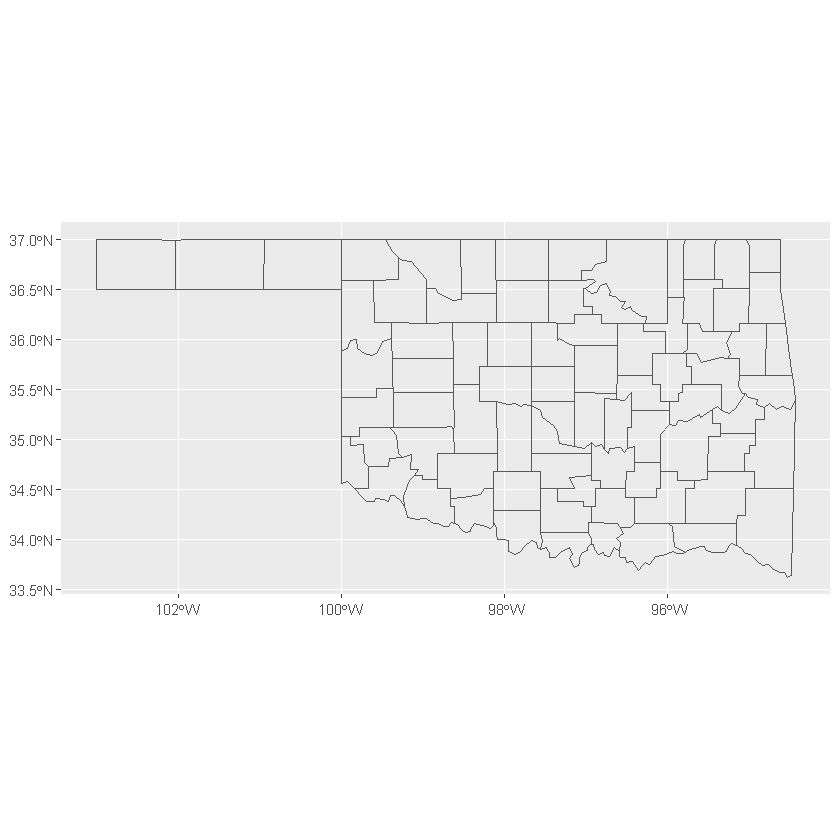

In [9]:
# okcounty 提供检点的 边界
ggplot(data = okcounty) +
  geom_sf(fill = NA)

In [9]:
names(tpoint)

[1] "om"       "yr"       "mo"       "dy"       "date"     "time"    
 [7] "tz"       "st"       "stf"      "stn"      "mag"      "inj"     
[13] "fat"      "loss"     "closs"    "slat"     "slon"     "elat"    
[19] "elon"     "len"      "wid"      "fc"       "geometry"

In [10]:
names(tpath)

[1] "om"       "yr"       "mo"       "dy"       "date"     "time"    
 [7] "tz"       "st"       "stf"      "stn"      "mag"      "inj"     
[13] "fat"      "loss"     "closs"    "slat"     "slon"     "elat"    
[19] "elon"     "len"      "wid"      "fc"       "geometry"

##### 只取 2016 - 2021 的数据

In [11]:
tpoint_16_21 <- tpoint %>%
  filter(yr >= 2016 & yr <= 2021) %>%
  select(om, yr, date)
tpath_16_21 <- tpath %>%
  filter(yr >= 2016 & yr <= 2021) %>%
  select(om, yr, date)

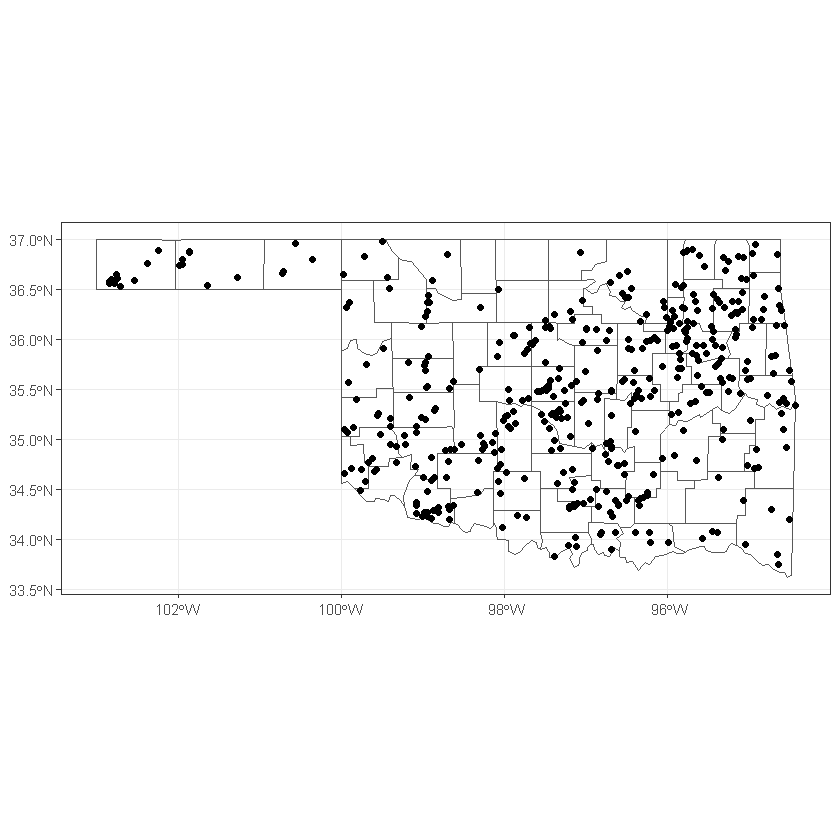

In [12]:
# 可视化点数据：龙卷风出现的位置
ggplot() +
  geom_sf(data = okcounty, fill = NA) +
  geom_sf(data = tpoint_16_21) +
  theme_bw()

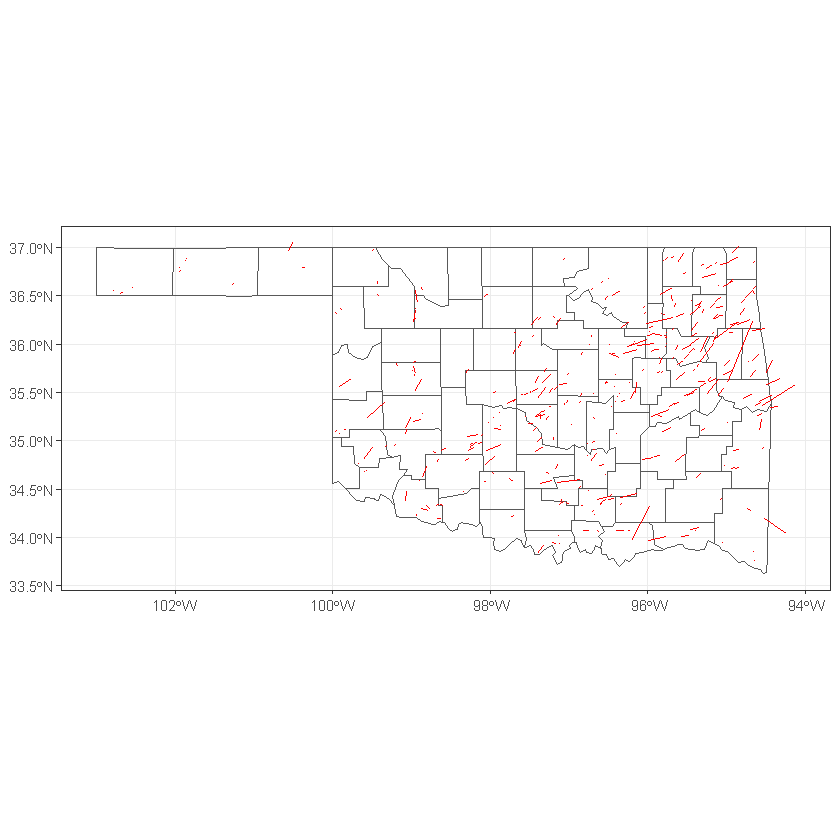

In [13]:
# 可视化线数据：龙卷风的轨迹
ggplot() +
  geom_sf(data = okcounty, fill = NA) +
  geom_sf(data = tpath_16_21, 
          color = "red", 
          size = 1) +
  theme_bw()

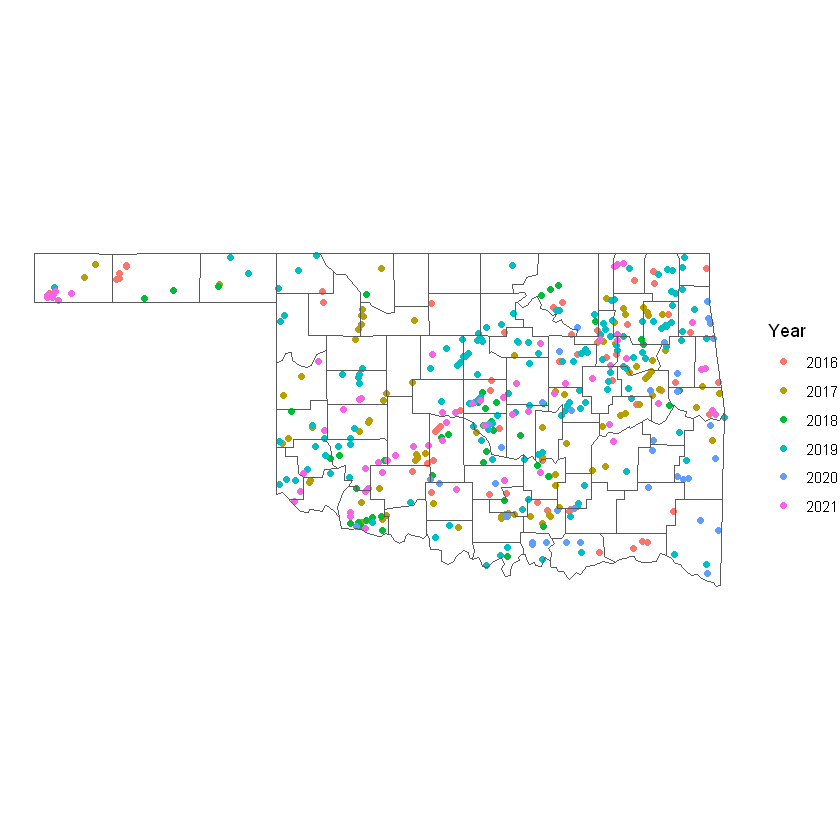

In [14]:
# 针对不同年份加以区分
ggplot() +
  geom_sf(data = tpoint_16_21, 
          aes(color = as.factor(yr))) +
  geom_sf(data = okcounty, fill = NA) +
  scale_color_discrete(name = "Year") +
  coord_sf(datum = NA) +
  theme_void()

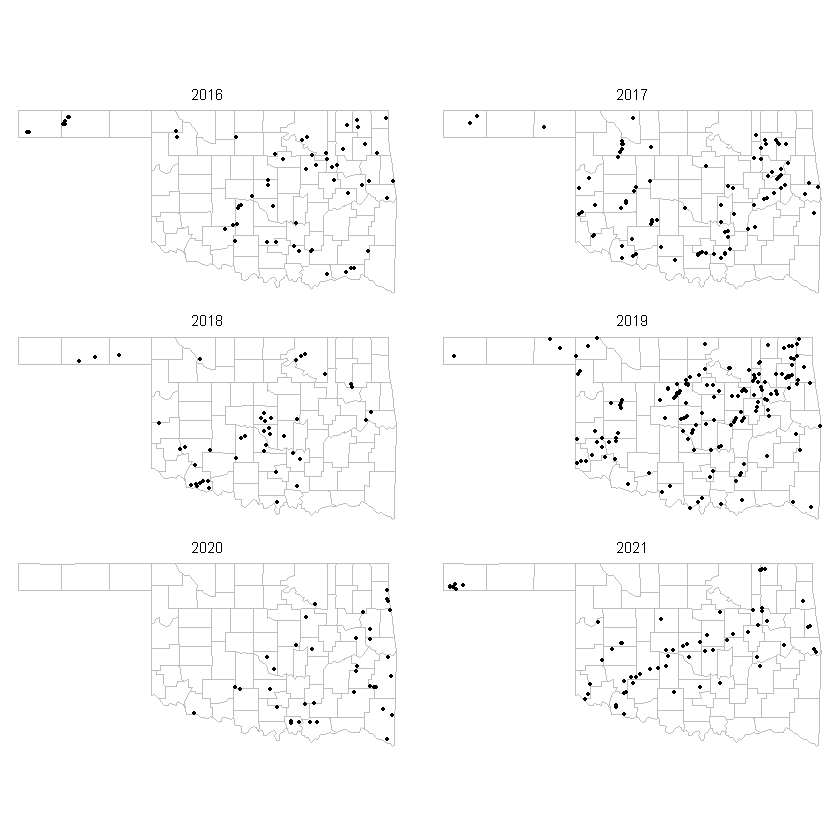

In [15]:
# 铺平呈现不同年的情况
ggplot() +
  geom_sf(data = okcounty, 
          fill = NA, 
          color = "gray") +
  geom_sf(data = tpoint_16_21, size = 0.75) +
  facet_wrap(vars(yr), ncol = 2) +
  coord_sf(datum = NA) +
  theme_void()

### 叠加矢量数据集（Overlaying Vector Datasets）

如何基于地理信息把不同的数据集拼起来？

使用 st_join() ，该函数可以基于地理信息，而非其他feature拼接数据

下面我们拼接 tpoint_16_21 和 okcounty


In [19]:
countypnt <- st_join(tpoint_16_21, okcounty)
head(countypnt,3)

,om,yr,date,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,geometry
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POINT [arc_degree]>
1,613662,2016,2016-03-23,40,001,01101788,0500000US40001,40001,Adair,06,POINT (-94.5042 35.6916)
2,613675,2016,2016-03-30,40,113,01101844,0500000US40113,40113,Osage,06,POINT (-96.0151 36.2151)
3,613676,2016,2016-03-30,40,105,01101840,0500000US40105,40105,Nowata,06,POINT (-95.5523 36.7291)


In [20]:
head(tpoint_16_21,3)
head(okcounty,3)

,om,yr,date,geometry
,<dbl>,<dbl>,<chr>,<POINT [arc_degree]>
1,613662,2016,2016-03-23,POINT (-94.5042 35.6916)
2,613675,2016,2016-03-30,POINT (-96.0151 36.2151)
3,613676,2016,2016-03-30,POINT (-95.5523 36.7291)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POLYGON [arc_degree]>
1,40,077,01101826,0500000US40077,40077,Latimer,06,POLYGON ((-95.50766 35.0292...
2,40,025,01101800,0500000US40025,40025,Cimarron,06,POLYGON ((-103.0025 36.6751...
3,40,011,01101793,0500000US40011,40011,Blaine,06,POLYGON ((-98.6369 36.16489...


拼接后数据仍保存每一次龙卷风的记录，但是是以 tpoint_16_21 作为主体

要计算每个 county 龙卷风的总数，需要基于GEOID分组



In [21]:
# 分组之前 countypnt 需要由 sf，转化为一般数据格式（也就是需要去掉地理信息）
countypnt <- st_drop_geometry(countypnt)
head(countypnt)

,om,yr,date,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,613662,2016,2016-03-23,40,001,01101788,0500000US40001,40001,Adair,06
2,613675,2016,2016-03-30,40,113,01101844,0500000US40113,40113,Osage,06
3,613676,2016,2016-03-30,40,105,01101840,0500000US40105,40105,Nowata,06
4,613677,2016,2016-03-30,40,131,01101853,0500000US40131,40131,Rogers,06
5,613678,2016,2016-03-30,40,035,01101805,0500000US40035,40035,Craig,06
6,613727,2016,2016-04-15,40,139,01101857,0500000US40139,40139,Texas,06


In [22]:
# 计算每组（每个county）龙卷风的数量
countysum <- countypnt %>%
  group_by(GEOID) %>%
  summarize(tcnt = n())

countysum

GEOID,tcnt
<chr>,<int>
40001,6
40005,3
40007,4
40009,8
40011,1
40013,4
40015,10
40017,5
40019,7


##### 根据"GEOID"，把 countysum 拼接进入 okcounty 

In [24]:
countymap <- okcounty %>%
  left_join(countysum, by = "GEOID") %>%
  replace(is.na(.), 0) %>%                    # 缺失值取0
  mutate(area = st_area(okcounty),             # st_area 计算区域面积
         tdens = 10^6 * 10^3 * tcnt / area) %>%  # 计算每个 county 龙卷风密度
  units::drop_units()                                 # 
head(countymap)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,tcnt,geometry,area,tdens
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<POLYGON [arc_degree]>,<dbl>,<dbl>
1,40,077,01101826,0500000US40077,40077,Latimer,06,1,POLYGON ((-95.50766 35.0292...,1890663261,0.5289149
2,40,025,01101800,0500000US40025,40025,Cimarron,06,12,POLYGON ((-103.0025 36.6751...,4766283042,2.5176851
3,40,011,01101793,0500000US40011,40011,Blaine,06,1,POLYGON ((-98.6369 36.16489...,2427121029,0.4120108
4,40,107,01101841,0500000US40107,40107,Okfuskee,06,10,POLYGON ((-96.62486 35.4627...,1657249513,6.0340944
5,40,105,01101840,0500000US40105,40105,Nowata,06,6,POLYGON ((-95.80982 36.9419...,1503893122,3.9896452
6,40,153,01101864,0500000US40153,40153,Woodward,06,2,POLYGON ((-99.60556 36.5927...,3227039659,0.6197631


##### 导出新的 shp 数据

In [26]:
st_write(countymap, 
         dsn = "C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/new/oktornadosum.shp", 
         append = FALSE)

Writing layer `oktornadosum' to data source 
  `C:/Users/77387/Desktop/Data_analysis_courses/R璇█涓庡湴鐞嗕俊鎭鐞<86>/Chapter5/new/oktornadosum.shp' using driver `ESRI Shapefile'
Writing 77 features with 10 fields and geometry type Polygon.


Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 1890663260.74708939 of field area of feature 0 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 4766283042.1210289 of field area of feature 1 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 2427121028.65618324 of field area of feature 2 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 1657249513.42733097 of field area of feature 3 not successfully written. Possibly due to too larger number with respect to field width"
W

Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 1811018955.24967265 of field area of feature 33 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 1539226567.61584067 of field area of feature 34 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 2063886104.06124663 of field area of feature 35 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 3542155971.16223907 of field area of feature 36 not successfully written. Possibly due to too larger number with respect to field wid

Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 3683401354.59223175 of field area of feature 66 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 2016984016.96580172 of field area of feature 67 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 2307036696.18674183 of field area of feature 68 not successfully written. Possibly due to too larger number with respect to field width"
Warning message in CPL_write_ogr(obj, dsn, layer, driver, as.character(dataset_options), :
"GDAL Message 1: Value 2279812231.56843567 of field area of feature 69 not successfully written. Possibly due to too larger number with respect to field wid

##### 导出 gpkg， 这是一种轻量级的地理信息数据格式，数据存储在SQLite 数据库中

In [27]:
st_write(countymap, 
         dsn = "C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/new/oktornado.gpkg", 
         layer = "countysum",
         delete_dsn = TRUE)

Deleting source `C:/Users/77387/Desktop/Data_analysis_courses/R璇█涓庡湴鐞嗕俊鎭鐞<86>/Chapter5/new/oktornado.gpkg' failed
Writing layer `countysum' to data source 
  `C:/Users/77387/Desktop/Data_analysis_courses/R璇█涓庡湴鐞嗕俊鎭鐞<86>/Chapter5/new/oktornado.gpkg' using driver `GPKG'
Writing 77 features with 10 fields and geometry type Polygon.


##### 导出为 GeoJSON 数据

In [28]:
st_write(countymap, "C:/Users/77387/Desktop/Data_analysis_courses/R语言与地理信息处理/Chapter5/new/oktornado.geojson", 
         layer_options = "RFC7946 = YES") # "RFC7946 = YES"是最新的GeoJSON数据

Writing layer `oktornado' to data source 
  `C:/Users/77387/Desktop/Data_analysis_courses/R璇█涓庡湴鐞嗕俊鎭鐞<86>/Chapter5/new/oktornado.geojson' using driver `GeoJSON'
options:        RFC7946 = YES 
Writing 77 features with 10 fields and geometry type Polygon.


### 地区分布图（等值图 choropleth map）

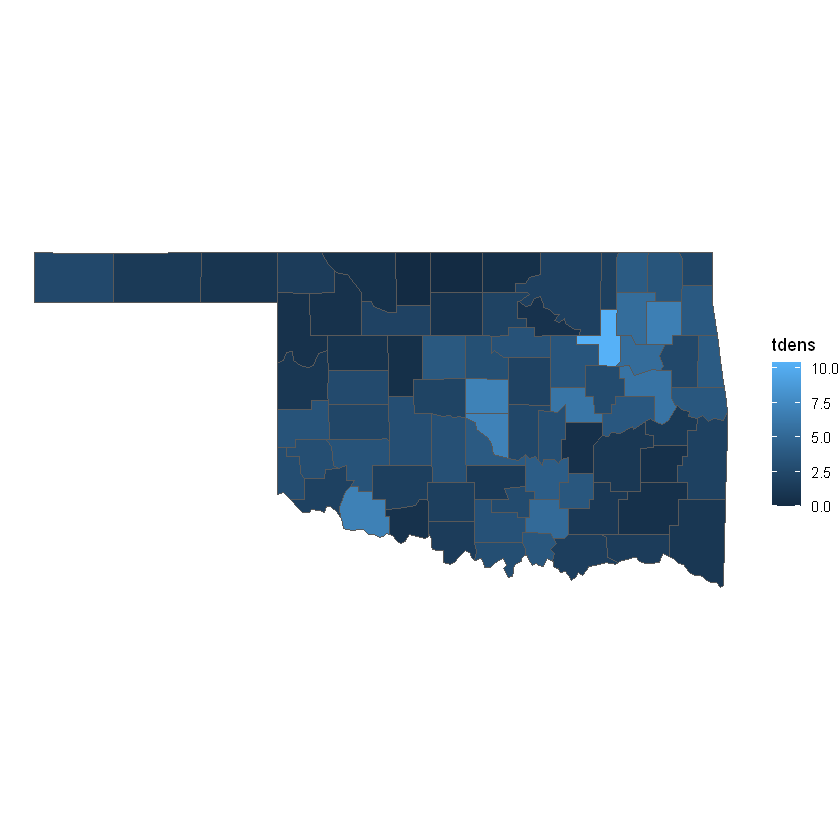

In [23]:
ggplot(data = countymap) +
  geom_sf(aes(fill = tdens)) +
  theme_void()

In [29]:
st_geometry_type(okcounty, by_geometry=FALSE) # 地理信息的几何类型？

[1] POLYGON
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

In [25]:
okcntrd = st_centroid(countymap) # st_centroid 生成每一个county的重心点
st_geometry_type(okcntrd, by_geometry = FALSE) # 地理信息的几何类型？

Warning message:
"st_centroid assumes attributes are constant over geometries"


[1] POINT
18 Levels: GEOMETRY POINT LINESTRING POLYGON MULTIPOINT ... TRIANGLE

##### 可视化

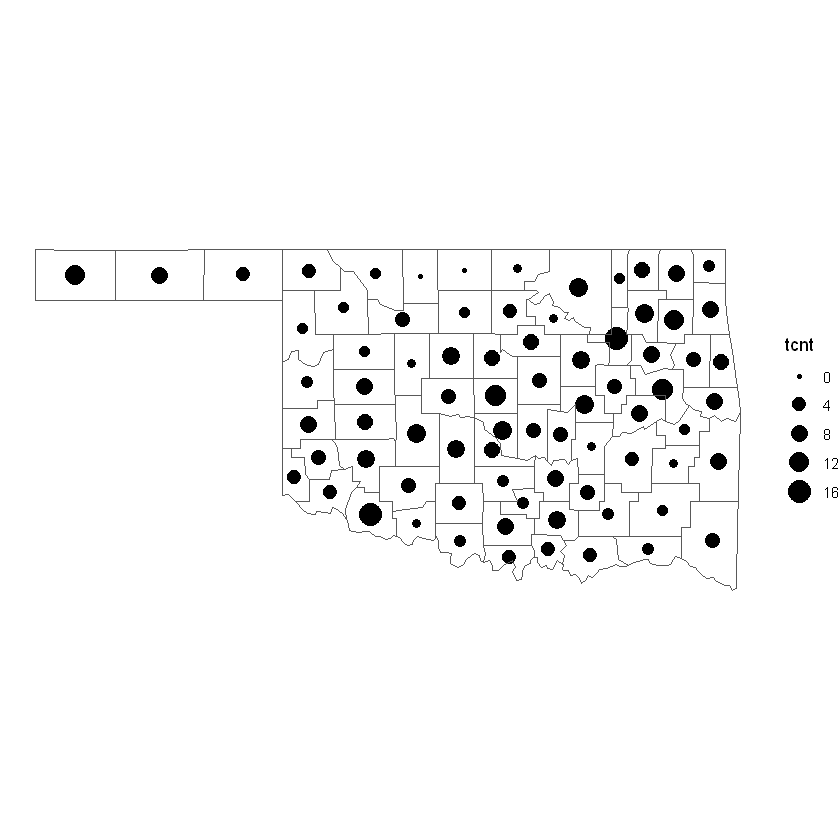

In [26]:
ggplot() +
  geom_sf(data = okcntrd, aes(size = tcnt)) + # 可视化点
  geom_sf(data = okcounty, fill = NA) + #可视化polygon
  theme_void()

### 修改地图外观

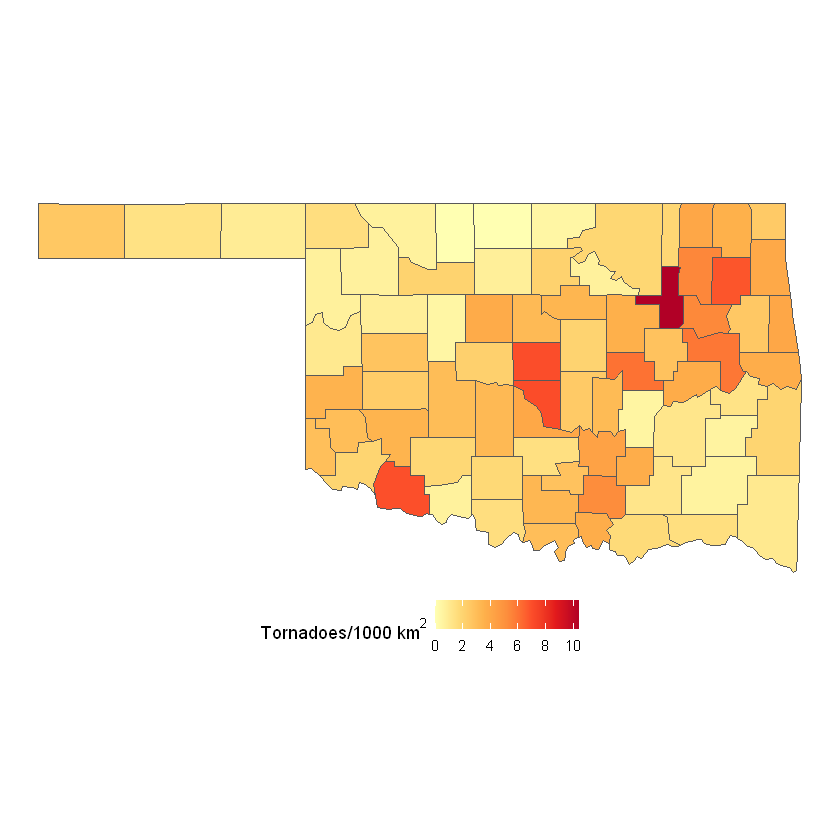

In [27]:
ggplot(data = countymap) +
  geom_sf(aes(fill = tdens)) +
  scale_fill_distiller(name = expression("Tornadoes/1000 km"^2), 
                       palette = "YlOrRd", 
                       breaks = pretty_breaks(),
                       direction = 1) +
  theme_void() +
  theme(legend.position = "bottom")

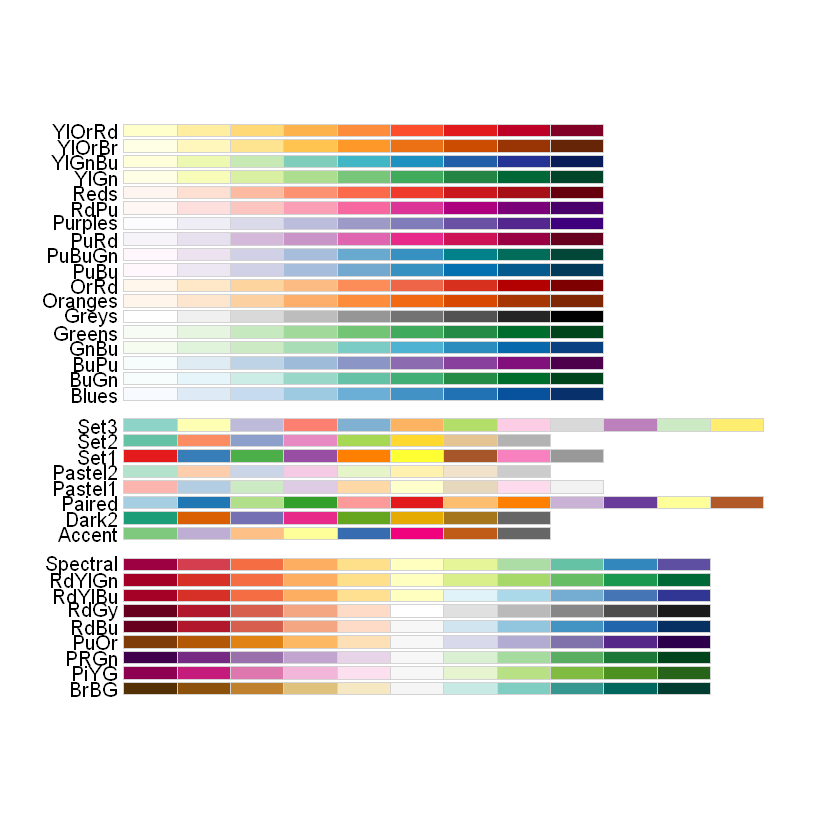

In [28]:
display.brewer.all()

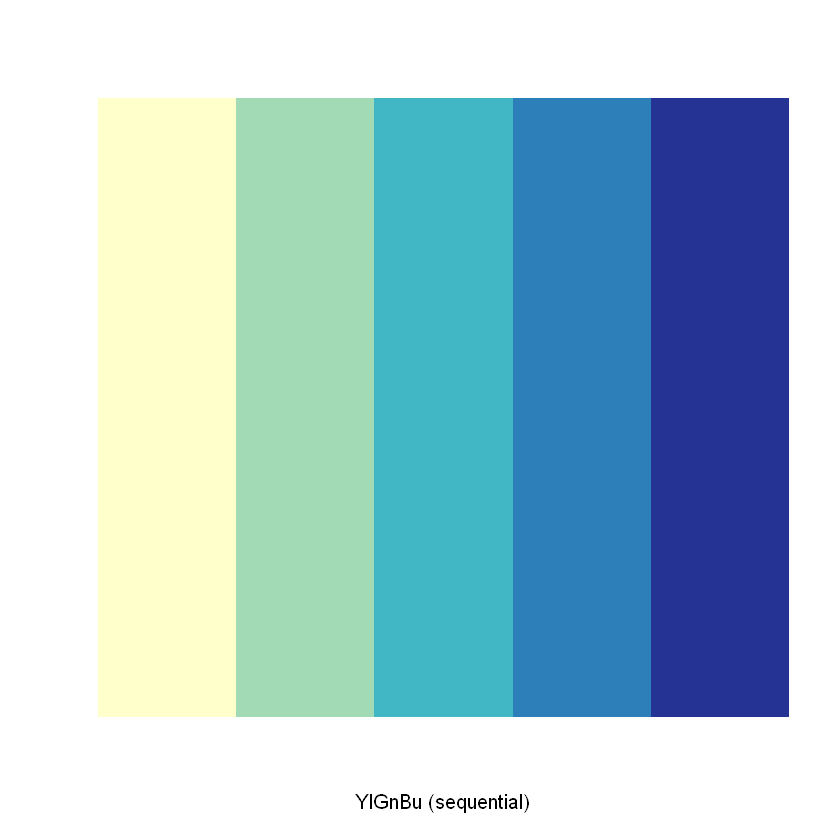

In [29]:
display.brewer.pal(5, "YlGnBu")

In [30]:
numclas <- 4
qbrks <- seq(0, 1, length.out = numclas + 1)
qbrks

[1] 0.00 0.25 0.50 0.75 1.00

In [35]:
countymap <- countymap %>%
  mutate(tdens_c1 = cut(tdens,
                        breaks = quantile(tdens, breaks = qbrks),
                        include.lowest = T))

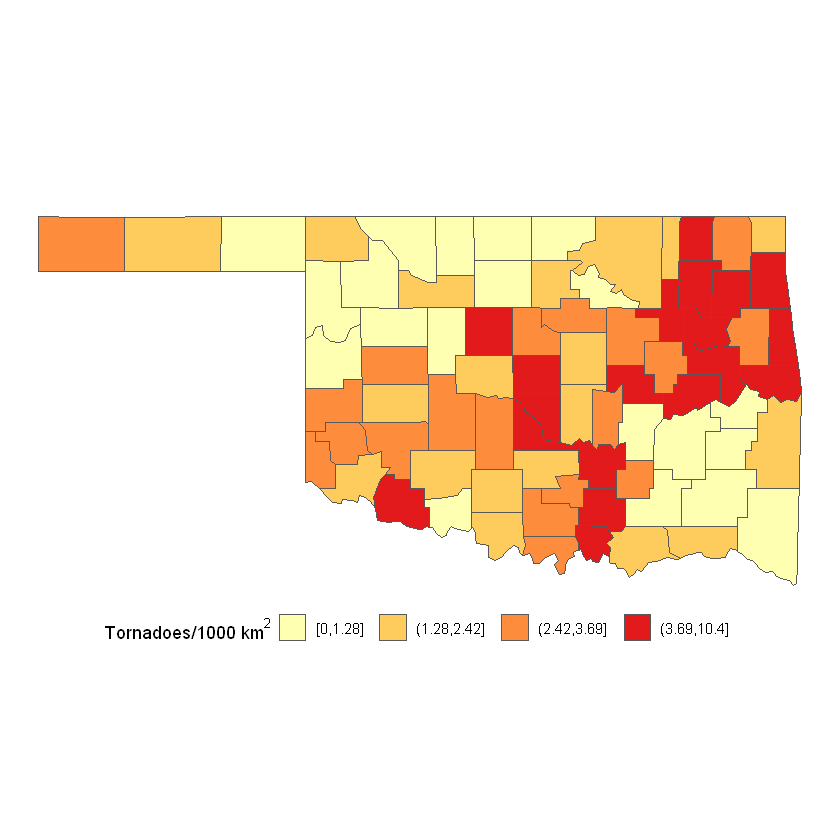

In [36]:
ggplot(data = countymap) +
  geom_sf(aes(fill = tdens_c1)) +
  scale_fill_brewer(name = expression("Tornadoes/1000 km"^2),   
                    palette = "YlOrRd") +
  theme_void() +
  theme(legend.position = "bottom") 

In [37]:
maxcnt <- max(okcntrd$tcnt)
brkpts <- c(0, 2, 5, 10, maxcnt)
okcntrd <- okcntrd %>%
  mutate(tcnt_c1 = cut(tcnt,
                        breaks = brkpts,
                        include.lowest = T))

Warning message:
"Using size for a discrete variable is not advised."


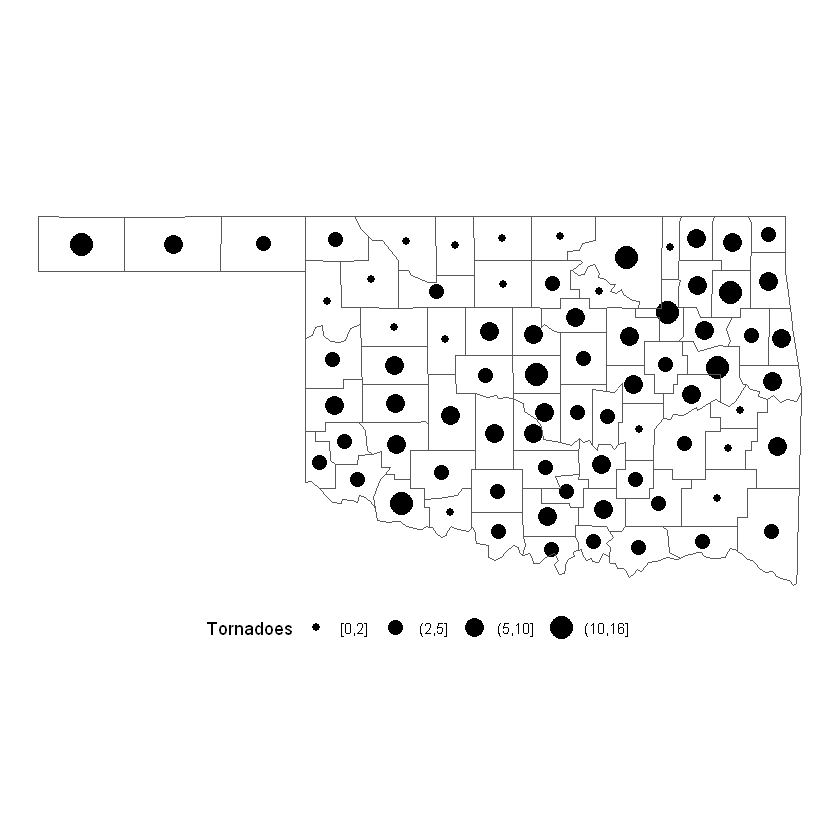

In [38]:
ggplot(data = okcntrd) +
  geom_sf(aes(size = tcnt_c1)) +
  scale_size_discrete(name="Tornadoes") +
  geom_sf(data = okcounty, fill = NA) +
  theme_void() +
  theme(legend.position = "bottom")

### 导出图

In [1]:
ggsave("tornado.png",  # 导出为 png
       width = 6, 
       height = 4, 
       dpi = 300)  # 绘图分辨率. Also accepts a string input: "retina" (320), "print" (300), or "screen" (72). 
ggsave("tornado2.png", 
       width = 15, 
       height = 10, 
       units = "cm", 
       dpi = 100)
ggsave("tornado.jpeg", 
       width = 6, 
       height = 4, 
       dpi = 300, 
       quality = 90)
ggsave("tornado.tiff", 
       width = 6, 
       height = 4, 
       dpi = 300, 
       compression = "lzw")
ggsave("tornado.pdf", 
       width = 6, 
       height = 4)